# Gradient Boosting Classifier
---
### Essential Libraries
Let us begin by importing the essential Python Libraries.

> Math : Library for Mathematical functions in Python
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Use file animeTV_MachineLearning.csv which contains the sampled data to combat data imbalance

In [2]:
animedata = pd.read_csv('animeTV_MachineLearning.csv')
animedata.head(n=-1)

,Unnamed: 0,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,...,Manga,Music,Novel,Original,Other,Picture book,Radio,Unknown,Visual novel,Web manga
0,4004,5184,Negibouzu no Asatarou,0,"Adventure, Comedy, Historical",Unknown,ねぎぼうずのあさたろう,TV,48,"Oct 12, 2008 to Sep 27, 2009",...,0,0,0,0,0,1,0,0,0,0
1,3033,3436,Meme Iroiro Yume no Tabi,700,"Adventure, Kids, Sci-Fi",The Many Dream Journeys of Meme,ミームいろいろ夢の旅,TV,127,"Apr 3, 1983 to Sep 29, 1985",...,0,0,0,0,0,0,0,1,0,0
2,148,170,Slam Dunk,900,"Comedy, Drama, School, Shounen, Sports",Slam Dunk,スラムダンク,TV,101,"Oct 16, 1993 to Mar 23, 1996",...,1,0,0,0,0,0,0,0,0,0
3,8395,21085,Witch Craft Works,800,"Action, Fantasy, Magic, Seinen, Supernatural",Unknown,ウィッチクラフトワークス,TV,12,"Jan 5, 2014 to Mar 23, 2014",...,1,0,0,0,0,0,0,0,0,0
4,6269,10554,Yakyuukyou no Uta,700,"Action, Drama, Sports",Unknown,野球狂の詩,TV,25,"Dec 23, 1977 to Mar 26, 1979",...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,16255,40608,Muv-Luv Alternative,0,"Action, Military, Sci-Fi, Drama, Mecha",Unknown,マブラヴ オルタネイティヴ,TV,Unknown,"Oct, 2021 to ?",...,0,0,0,0,0,0,0,0,1,0
908,16434,40911,Yuukoku no Moriarty,800,"Mystery, Historical, Psychological, Shounen",Moriarty the Patriot,憂国のモリアーティ,TV,11,"Oct 11, 2020 to Dec 20, 2020",...,1,0,0,0,0,0,0,0,0,0
909,16452,40953,Lalalacoco,0,"Slice of Life, Comedy, Kids",Unknown,LALALACOCO,TV,13,"Jan 7, 2020 to Mar 31, 2020",...,0,0,0,0,1,0,0,0,0,0
910,16625,41380,100-man no Inochi no Ue ni Ore wa Tatteiru,700,"Action, Game, Drama, Fantasy, Shounen","I'm standing on 1,000,000 lives.",100万の命の上に俺は立っている,TV,12,"Oct 2, 2020 to Dec 18, 2020",...,1,0,0,0,0,0,0,0,0,0


# Machine Learning



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7821917808219178

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6284153005464481

Accuracy 	Train Dataset
True Positive Rate 	: 67.2463768115942
False Positive Rate 	: 11.948051948051948
Accuracy 	Test Dataset
True Positive Rate 	: 52.12765957446809
False Positive Rate 	: 25.842696629213485
ACCURACY OF THE MODEL:  0.6284153005464481


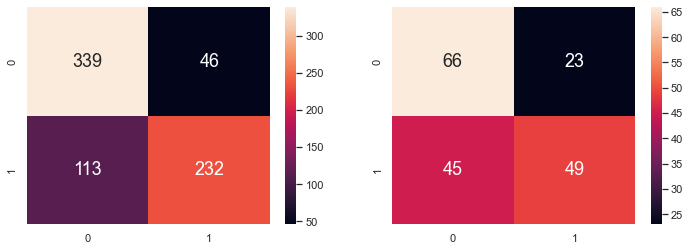

In [3]:
#Import essential models and functions from sklearn
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

SP = pd.DataFrame(animedata[["Score", "Ranked", "isManga"]])  # Predictors

HS = pd.DataFrame(animedata['HasSequel'])    # Response

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SP, HS, test_size = 0.20, train_size = 0.80)

# creating a GB classifier
clf = GradientBoostingClassifier(n_estimators=100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train.values, y_train.values.ravel())

# performing predictions on the test dataset
y_pred = clf.predict(X_test.values)

# metrics are used to find accuracy or error
from sklearn import metrics

# Predict Response corresponding to Predictors
y_train_pred = clf.predict(X_train.values)
y_test_pred = clf.predict(X_test.values)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train.values, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test.values, y_test))
print()

from sklearn.metrics import confusion_matrix

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#Print the True & False Positive Rates & Classification Accuracy for the train set
cm = metrics.confusion_matrix(y_train, y_train_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100

print("Accuracy \tTrain Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

#Print the True & False Positive Rates & Classification Accuracy for the test set
cm = metrics.confusion_matrix(y_test, y_test_pred)
numerator = cm[1][1]
denominator = cm[1][0] + cm[1][1]
tpr = (numerator/denominator)*100
numerator = cm[0][1]
denominator = cm[0][0] + cm[0][1]
fpr = (numerator/denominator)*100

print("Accuracy \tTest Dataset")
print("True Positive Rate \t:", tpr)
print("False Positive Rate \t:", fpr)

# using metrics module for accuracy calculation
x = metrics.accuracy_score(y_test, y_pred)
print("ACCURACY OF THE MODEL: ", x)

In [4]:
#predicting if NyanPire the Animation has a sequel
clf.predict([[6.68, 5009.0, 1]])

array(['No Sequel'], dtype=object)

In [5]:
#predicting if Aldnoah.zero has a sequel
clf.predict([[7.44, 1755.0, 0]])

array(['Sequel'], dtype=object)

In [6]:
#predicting if Attack on Titan: The Final Season Part 2 has a sequel
clf.predict([[8.90, 22.0, 1]])

array(['Sequel'], dtype=object)